Accuracy: 0.9981172926668549


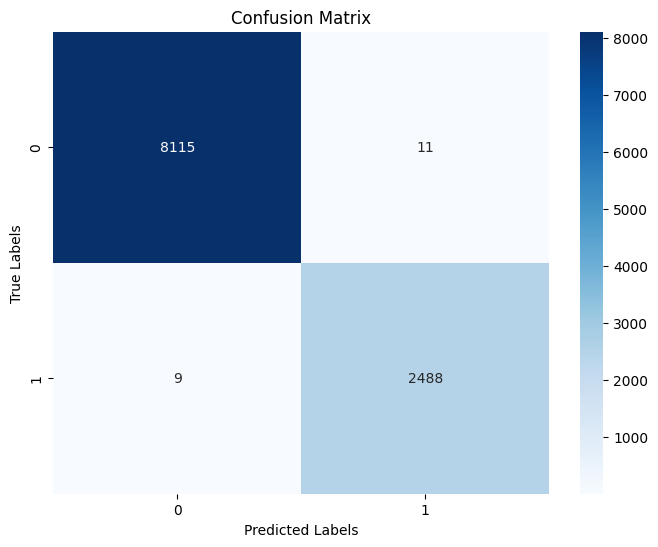

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('iot_dataset.csv')


# Split features (X) and target variable (y)
X = df.drop(columns=['SPRINKLER','Weighted_Average'])
y = df['SPRINKLER']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model and train
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Prediction
new_data = {}  # Store user input here
new_data['TEMPERATURE'] = float(input("Enter Temperature: "))
new_data['HUMIDITY'] = float(input("Enter Humidity: "))
new_data['SOIL MOISTURE'] = float(input("Enter Soil Moisture: "))
new_data['INTENSITY'] = float(input("Enter Intensity: "))

# Function to calculate weighted average for each row
weights = {'temperature': 0.28, 'humidity': 0.28, 'soil_moisture': 0.30, 'intensity': 0.14}

def calculate_weighted_average(data):
    weighted_sum = 0
    weighted_sum += weights['temperature'] * data['TEMPERATURE']
    weighted_sum += weights['humidity'] * data['HUMIDITY']
    weighted_sum += weights['soil_moisture'] * data['SOIL MOISTURE']
    weighted_sum += weights['intensity'] * data['INTENSITY']
    return weighted_sum

weighted_average = calculate_weighted_average(new_data)

# Prediction
new_data_df = pd.DataFrame([new_data])
new_data_df['Weighted_Average'] = weighted_average

prediction = model.predict(new_data_df.drop(columns=['Weighted_Average']))  # Exclude 'Weighted Average' from prediction
print("Predicted SPRINKLER Label:", prediction[0])


Enter Temperature: 35
Enter Humidity: 45
Enter Soil Moisture: 3000
Enter Intensity: 122
Predicted SPRINKLER Label: 0


In [ ]:
import joblib
joblib.dump(model, 'my_model.pkl')  # Save the model

['my_model.pkl']

In [ ]:
import joblib
import tensorflow as tf
from sklearn.svm import SVC  # Assuming your model is an SVM from scikit-learn

# Load the scikit-learn model
model = joblib.load('my_model.pkl')

# Convert to TensorFlow model (if needed)
# This is just a conceptual example and might not directly apply to your model
tf_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(53116,6)),  # Specify input shape
    # Add layers corresponding to the scikit-learn model
    # Example: tf.keras.layers.Dense(...),
    #          tf.keras.layers.Activation(...),
    #          ...
])

# Compile and train the TensorFlow model (if needed)

# Optimize TensorFlow model (optional)
# Example optimizations: quantization, pruning, etc.

# Convert TensorFlow model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('my_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [ ]:
classmap = {
    0: 'Off',
    1: 'On'
}

In [ ]:
!pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=c1b4a7a24c6eaec3d8c0f8ecd4ed860cb5f8f267f6619b1bb3f6cf1aa651bbb3
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [ ]:
from micromlgen import port

if __name__ == '__main__':
    # features, classmap = load_features('your-data-folder')
    # classifier = get_model(features)
    c_code = port(model)
    print(c_code)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
with open("model.h","w") as file:
  for i in c_code:
    file.write(i)